In [571]:
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline


In [572]:
#funkcije
def target(x):
    return 5*x

def Sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

def Relu(x):
    return x if (x > 0) else 0

Relu = np.vectorize(Relu)

def dRelu(x):
    return 0 if x<0 else 1;

dRelu = np.vectorize(dRelu)

def Error(h,Y):
    return ((h-Y)**2)

#Error = np.vectorize(Error)

def dError(E):
    return 2 * (E)

def setUpW(L):
    W = []
    n = len(L)-1
    for i in range (0,n):
        W.append(0.1 * np.random.randn(L[i+1],L[i])+0.5)
        #W[i] -= np.mean(W[i])
    return W
def setUpB(L):
    B = []
    n = len(L)-1
    for i in range (0,n):
        B.append(0.1 * np.random.randn(L[i+1],1)+0.5)
        #B[i] -= np.mean(B[i]) 
    return B

def forward(X,Y,W,B,L):
    H = []
    A = []
    n = len(L)-1
    for i in range(0,n):
        if i == 0:
            A.append(copy.deepcopy(X))
            H.append(copy.deepcopy(X))
            a = W[i].dot(X)+ B[i]
            A.append(a)
            h = Relu(a)
            H.append(h)
        elif i == n-1:
            a = np.dot(W[i],h) + B[i]
            A.append(a)
            h = a
            H.append(h)            
        else:
            a = W[i].dot(h) + B[i]
            A.append(a)
            h = Relu(a)
            H.append(h)
    return (A,H)

def backward(A,H,E,W,B,L,reg_param):
    
    d = dError(E)
    k = len(L)-1
    n = len(L)-1
    dB = []
    dW = []
    while k>0:
        #print (k)
        if k == len(L) -1:
            d = d * np.ones(H[k].shape)
        else:
            d= d * dRelu(H[k])
            
        
        dB.insert(0,d + reg_param * 2 * (H[n]) ) #  reg_param * 2 * H[len(L)-1] je izvod regularizacije
        dW.insert(0,d*((H[k-1].T)) + reg_param * 2 * (H[n]) )
   
        d = W[k-1].T.dot(d)
        k = k-1
    return (dW,dB)

def iteracija(X,Y,W,B,L,ni,reg_param):
    (A,H) = forward(X,Y,W,B,L)
    h = H[len(L)-1][0,0]
    #print (h)
    #print (Y)
    #E = Error(h,Y)
    E = (h-Y)**2
    C = E + reg_param * (h**2)
    (dW,dB) = backward(A,H,E,W,B,L,reg_param)
    #print (dW)
    Wr = []
    Br = []
    k = len(W)
    for i in range(0, k):
        Wr.append( W[i] - ni * dW[i])
        Br.append( B[i] - ni * dB[i])
    return (A,H,E,Wr,Br,C)

In [573]:
#inicijalizacija
L = [2,7,3,1]

W = setUpW(L)
B = setUpB(L)
ni = 0.00002

B

[array([[ 0.29860553],
        [ 0.72064863],
        [ 0.32504076],
        [ 0.52029476],
        [ 0.63579907],
        [ 0.46247275],
        [ 0.551172  ]]), array([[ 0.326579  ],
        [ 0.52820903],
        [ 0.40475047]]), array([[ 0.62282166]])]

In [574]:
reg_param = 0.002
B

[array([[ 0.29860553],
        [ 0.72064863],
        [ 0.32504076],
        [ 0.52029476],
        [ 0.63579907],
        [ 0.46247275],
        [ 0.551172  ]]), array([[ 0.326579  ],
        [ 0.52820903],
        [ 0.40475047]]), array([[ 0.62282166]])]

In [575]:
#init trening podataka
input_size = 500


Y = np.empty([input_size])
X = np.random.randn(input_size,L[0],1)*0.5+5
X -= np.mean(X,axis=0)
X /= np.std(X, axis = 0)


Y = X[:,0,0] + X[:,1,0]


In [576]:
#treniranje
niz = []
for i in range(0,input_size):
    (A,H,E,W,B,C) = iteracija(X[i],Y[i],W,B,L,ni,reg_param)
    niz.append(E)
    #print (H[len(L)-1][0,0])
    #print (E)


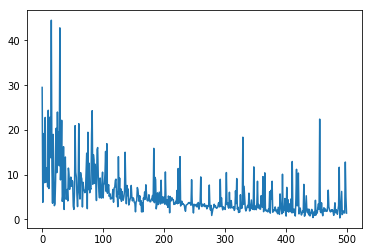

In [577]:
plt.plot(np.arange(input_size),np.array(niz))
#plt.ylim([-0.1,1000])

In [578]:
(A,H) = forward(np.array([[1.],[1.185]]),Y,W,B,L)

In [579]:
H

[array([[ 1.   ],
        [ 1.185]]), array([[ 1.43406452],
        [ 1.55417416],
        [ 1.20987943],
        [ 1.47626757],
        [ 1.69985271],
        [ 1.85821107],
        [ 1.68796738]]), array([[ 5.17650625],
        [ 6.56539575],
        [ 5.71866161]]), array([[ 3.03244112]])]

In [580]:
test_size = 100

Yt = np.empty([test_size])
Xt = np.random.randn(test_size,L[0],1)+3

Yt = (Xt[:,1,0]+Xt[:,0,0] )
Yt.shape

(100,)

In [581]:
nizT = []
for i in range(0,test_size):
    (A,H) = forward(Xt[i],Yt[i],W,B,L)
    nizT.append( H[len(L)-1][0,0])
len(nizT)

100

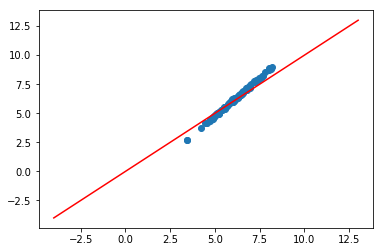

In [582]:
plt.scatter(nizT,Yt)
plt.plot(np.arange(-4,14), np.arange(-4,14),color ="r")
#plt.ylim([-2,4])

In [583]:
dRelu( np.array([ [1,2,-3],[-2,-1,-.04]]))

array([[1, 1, 0],
       [0, 0, 0]])